In [2]:
from lmfit import model
import numpy as np
import matplotlib.pyplot as plt

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2


def s(dB):
    return np.sqrt(10**(-dB/10))

# setup model

def exp_decay_radim(x, T, amp, offset, dB, alpha0):
    # xi = calc_squeez_parameter(dB)
    # s = np.exp(-xi)
    
    return offset-amp*np.exp(-x*s(dB)/(2*T)*alpha0**2)

def exp_decay_radim_s2(x, T, amp, offset, dB, alpha0):
    # xi = calc_squeez_parameter(dB)
    # s = np.exp(-xi)
    return offset-amp*np.exp(-x*s(dB)**2/(2*T)*alpha0**2)

def log_decay_radim_s2(x, T, amp, offset, dB, alpha0):
    # xi = calc_squeez_parameter(dB)
    # s = np.exp(-xi)
    return offset-np.log(amp*np.exp(-x*s(dB)**2/(2*T)*alpha0**2))

# load Data

$$ e^{-\frac{\tau s}{2T_1}|\alpha|^2}$$

In [3]:
# load data

vac_scale = 0.883
bootstrap_data = np.load('data/bootstrap_data.npy')[0]/vac_scale
bootstrap_error_bars = np.load('data/bootstrap_data.npy')[1]/vac_scale

# normalize data and add point for away that is zero
y_list = []
cut_step = 6
for i,data in enumerate(bootstrap_data):
       y_list.append( ((-data[:cut_step]/np.min(data))))
       
decay_times = np.array([  1.,  10.,  20.,  35.,  50.,  70., 100.,
       150., 200.])
x = decay_times[:cut_step]

xvec = np.linspace(0,1000,100)

# setup model

In [4]:
# setup fit model
from lmfit import Model


gmodel = Model(exp_decay_radim_s2)
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

gmodel.set_param_hint('T', value=200)
gmodel.set_param_hint('amp', value=1, vary = False)
gmodel.set_param_hint('offset', value=0, vary = False)
gmodel.set_param_hint('dB', value=0, vary = False)
gmodel.set_param_hint("alpha0", value = 3.47, vary = False)
params = gmodel.make_params()

params

parameter names: ['T', 'amp', 'offset', 'dB', 'alpha0']
independent variables: ['x']


name,value,initial value,min,max,vary
T,200.000000,None,-inf,inf,True
amp,1.00000000,None,-inf,inf,False
offset,0.00000000,None,-inf,inf,False
dB,0.00000000,None,-inf,inf,False
alpha0,3.47000000,None,-inf,inf,False


[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00221808
    reduced chi-square = 4.4362e-04
    Akaike info crit   = -45.4172436
    Bayesian info crit = -45.6254841
[[Variables]]
    T:       266.741820 +/- 8.08138302 (3.03%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      0 (fixed)
    alpha0:  3.47 (fixed)


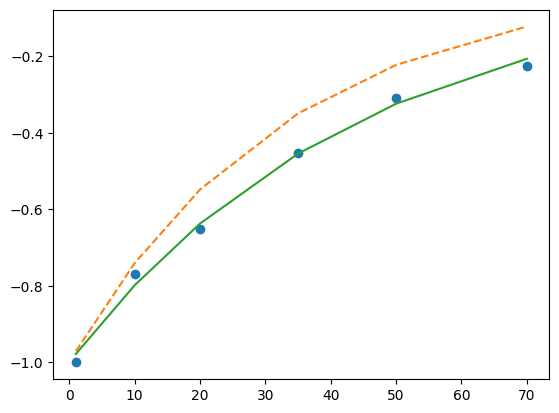

[266.7418201909923]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00390659
    reduced chi-square = 7.8132e-04
    Akaike info crit   = -42.0211012
    Bayesian info crit = -42.2293417
[[Variables]]
    T:       241.686974 +/- 11.2413367 (4.65%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      3 (fixed)
    alpha0:  3.39009 (fixed)


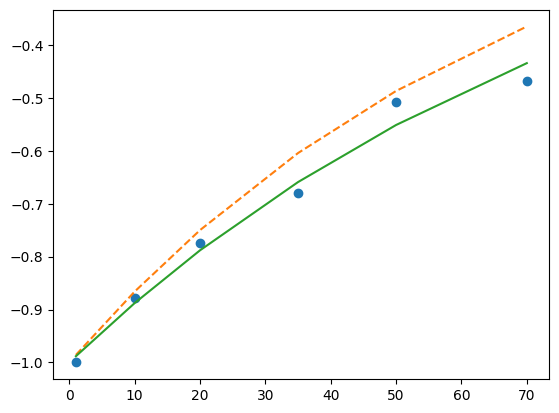

[266.7418201909923, 241.6869738632778]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00228910
    reduced chi-square = 4.5782e-04
    Akaike info crit   = -45.2281258
    Bayesian info crit = -45.4363663
[[Variables]]
    T:       260.612413 +/- 13.6496828 (5.24%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      6.7 (fixed)
    alpha0:  3.806385 (fixed)


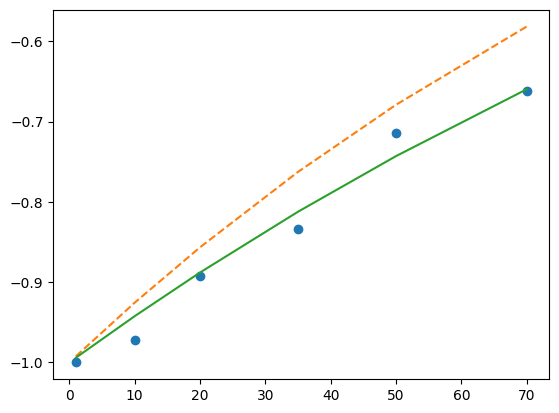

[266.7418201909923, 241.6869738632778, 260.6124125422803]
[[Model]]
    Model(exp_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00383438
    reduced chi-square = 7.6688e-04
    Akaike info crit   = -42.1330410
    Bayesian info crit = -42.3412816
[[Variables]]
    T:       262.093337 +/- 18.7132356 (7.14%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      7.6 (fixed)
    alpha0:  4.078016 (fixed)


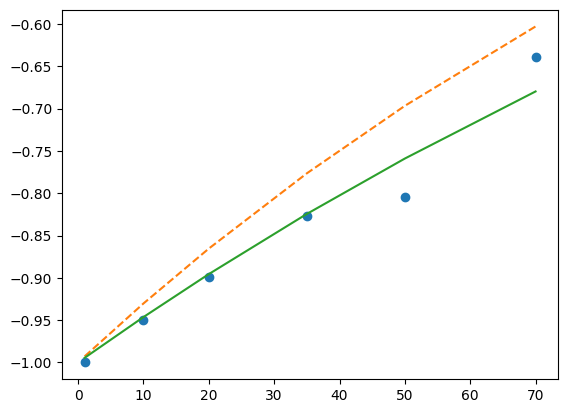

[266.7418201909923, 241.6869738632778, 260.6124125422803, 262.09333707443494]


In [5]:
dB_values = [0, 3, 6.7, 7.6]
alpha0_exp = np.array([3.47      , 3.39009011, 3.8063846 , 4.07801596])*1 # see appendix
T_values = []
for i, y in enumerate(y_list):
    params["dB"].value = dB_values[i]
    params["alpha0"].value = alpha0_exp[i]
    
    result = gmodel.fit(y, params, x=x)
    T_values.append(result.values["T"])
    print(result.fit_report())
    
    plt.plot(x, y, 'o')
    plt.plot(x, result.init_fit, '--', label='initial fit')
    plt.plot(x, result.best_fit, '-', label='best fit')
    plt.plot()
    # plt.plot(x_test,exp_decay_radim_s2(x_test, T = 15.5333556 , amp =0.3579025, offset=0, dB = 6.7) )
    plt.show()
    
    print(T_values)
        

In [6]:
result.best_fit

array([-0.99450187, -0.94635924, -0.89559582, -0.82451033, -0.75906706,
       -0.67981729])

## For log fit


In [7]:
# load data

vac_scale = 0.883
bootstrap_data = np.load('data/bootstrap_data.npy')[0]/vac_scale
bootstrap_error_bars = np.load('data/bootstrap_data.npy')[1]/vac_scale

# normalize data and add point for away that is zero
y_list = []
cut_step = 6
for i,data in enumerate(bootstrap_data):
       y_list.append( -np.log(data[:cut_step]/np.min(data)))
       
decay_times = np.array([  1.,  10.,  20.,  35.,  50.,  70., 100.,
       150., 200.])
x = decay_times[:cut_step]

xvec = np.linspace(0,1000,100)

In [8]:
# setup fit model
from lmfit import Model


gmodel = Model(log_decay_radim_s2)
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

gmodel.set_param_hint('T', value=200)
gmodel.set_param_hint('amp', value=1, vary = False)
gmodel.set_param_hint('offset', value=0, vary = False)
gmodel.set_param_hint('dB', value=0, vary = False)
gmodel.set_param_hint("alpha0", value = 3.47, vary = False)
params = gmodel.make_params()

params

parameter names: ['T', 'amp', 'offset', 'dB', 'alpha0']
independent variables: ['x']


name,value,initial value,min,max,vary
T,200.000000,None,-inf,inf,True
amp,1.00000000,None,-inf,inf,False
offset,0.00000000,None,-inf,inf,False
dB,0.00000000,None,-inf,inf,False
alpha0,3.47000000,None,-inf,inf,False


[[Model]]
    Model(log_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 6
    # variables        = 1
    chi-square         = 0.01100007
    reduced chi-square = 0.00220001
    Akaike info crit   = -35.8096799
    Bayesian info crit = -36.0179204
[[Variables]]
    T:       272.249242 +/- 6.04472938 (2.22%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      0 (fixed)
    alpha0:  3.47 (fixed)


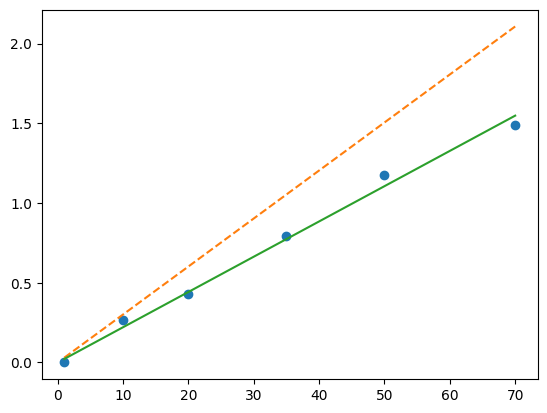

[272.2492421453163]
[[Model]]
    Model(log_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.01362824
    reduced chi-square = 0.00272565
    Akaike info crit   = -34.5242242
    Bayesian info crit = -34.7324647
[[Variables]]
    T:       245.581337 +/- 11.4443637 (4.66%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      3 (fixed)
    alpha0:  3.39009 (fixed)


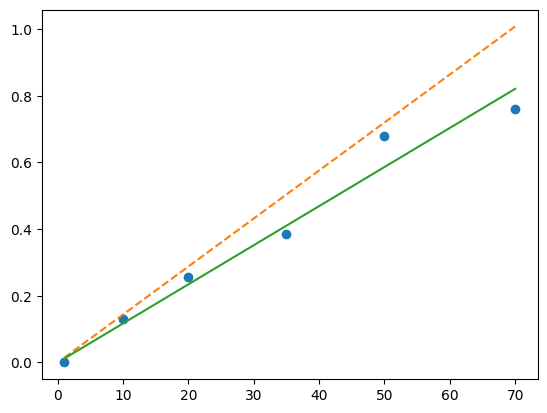

[272.2492421453163, 245.58133705108784]
[[Model]]
    Model(log_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00333984
    reduced chi-square = 6.6797e-04
    Akaike info crit   = -42.9615427
    Bayesian info crit = -43.1697832
[[Variables]]
    T:       258.588758 +/- 11.6803490 (4.52%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      6.7 (fixed)
    alpha0:  3.806385 (fixed)


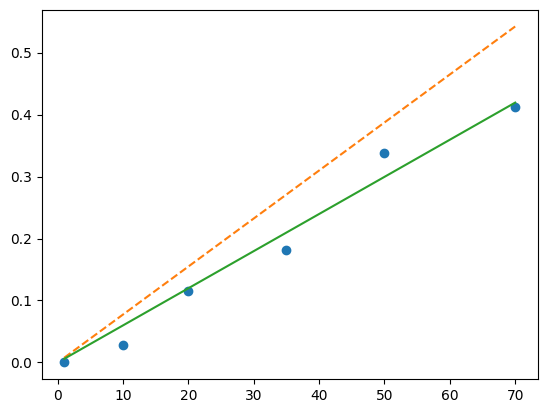

[272.2492421453163, 245.58133705108784, 258.58875824043054]
[[Model]]
    Model(log_decay_radim_s2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 1
    chi-square         = 0.00720072
    reduced chi-square = 0.00144014
    Akaike info crit   = -38.3520021
    Bayesian info crit = -38.5602426
[[Variables]]
    T:       256.352875 +/- 18.0661887 (7.05%) (init = 200)
    amp:     1 (fixed)
    offset:  0 (fixed)
    dB:      7.6 (fixed)
    alpha0:  4.078016 (fixed)


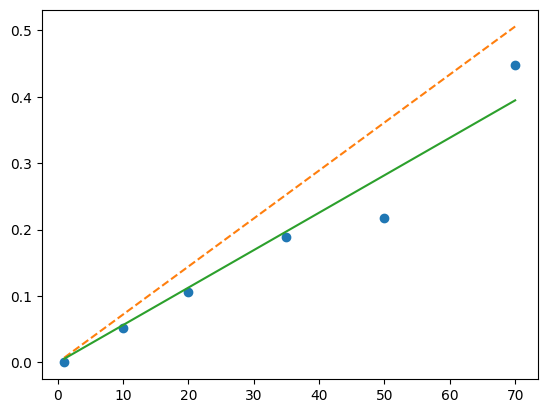

[272.2492421453163, 245.58133705108784, 258.58875824043054, 256.3528749573069]


In [9]:
dB_values = [0, 3, 6.7, 7.6]
alpha0_exp = np.array([3.47      , 3.39009011, 3.8063846 , 4.07801596])*1 # see appendix
T_values = []
for i, y in enumerate(y_list):
    params["dB"].value = dB_values[i]
    params["alpha0"].value = alpha0_exp[i]
    
    result = gmodel.fit(y, params, x=x)
    T_values.append(result.values["T"])
    print(result.fit_report())
    
    plt.plot(x, y, 'o')
    plt.plot(x, result.init_fit, '--', label='initial fit')
    plt.plot(x, result.best_fit, '-', label='best fit')
    plt.plot()
    # plt.plot(x_test,exp_decay_radim_s2(x_test, T = 15.5333556 , amp =0.3579025, offset=0, dB = 6.7) )
    plt.show()
    
    print(T_values)
        

## Appendix

### Ideal theoretical alphas

In [11]:
dBs = np.array([0, 3, 6.7, 7.6])
zs = calc_squeez_parameter(-dBs)
alpha0 = 1.8
gammas = alpha0*(np.cosh(zs) + np.sinh(zs))
gammas


array([1.8       , 1.27430241, 0.83228584, 0.75036489])

### alpha0 for experimental Data
Used the extracted peak positions together with the respective compression value to find the corresponding alpha0

In [165]:
gammas_exp = np.array([3.47, 2.4, 1.76, 1.7])
alpha0_exp = gammas_exp/(np.cosh(zs) + np.sinh(zs))
alpha0_exp


array([3.47      , 3.39009011, 3.8063846 , 4.07801596])

In [23]:
decay_times[cut_step-1]

70.0

In [12]:
print(s(dBs))

[1.         0.70794578 0.46238102 0.41686938]


In [ ]:
# fit log, and not exponential as it will be more robust.